# Método de aceptacion y rechazo
Generar una muestra de la variable con distribución
$$f(x)=20x(1-x)^{3}, \qquad 0 <x< 1 $$

## Teorema fundamenrtal de la simulacion

Simular $X \sim f(x)$ es equivalente a simular
$$(X,U) \sim u\{(x,u) : 0 < u < f(x) \}   $$

Esto se puede reescribir como:

$$ f(x) = \int \limits_{0}^{f(x)}  du$$

### Ejemplo:

Queremos generar un $x \sim f(x)$, suponiendo que sabemos como generar $g(x)$ y sabemos que:

$$\frac{f(y)}{g(y)} \leq c ;\quad  para \quad todo \quad y $$

## Metodo:

* Generar $y$ con distribución $g(x)$.
* Generar un numero aleatorio U
* si $U \leq \frac{f(y)}{g(y)}$ , hacer $x=y$.




In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math

In [1]:
def beta(x):
  return 20*x*(1-x)**3

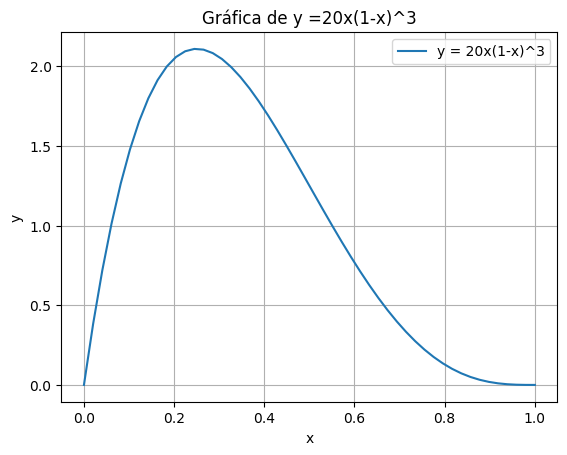

In [10]:
# Grafica de la función de distribución para vizualizar los máx

x = np.linspace(0, 1) 
y=beta(x)
plt.plot(x,y,label='y = 20x(1-x)^3')
plt.title('Gráfica de y =20x(1-x)^3')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Aqui para este caso podemos usar el criterio de la primera y segunda deriva para calcular el máx de la función:

* $\textbf{Primera deriva:}$
  $$\frac{d}{dx} (20x(1-x)^{3})=20[(1-x)^{3}-3x(1-x)^{2}]=20(1-x)^{2}[(1-4x)]=0 $$

Esto tiene como raices a $x_{1}=\frac{1}{4}$ & $x_{2}=1$, de la gráfica anterior podemos ver que el máx esta en $x=\frac{1}{4}$
por lo que evaluaremos la función y asi conocer el valor que acota a la función beta.

  

In [11]:
print("El valor de beta en el x=0.25 es:",beta(0.25))

El valor de beta en el x=0.25 es: 2.109375


En gral. usamos una distribución que ya sepamos generar la cual es $g(x)$, ahora de la definición sabemos que:

$$\frac{f(y)}{g(y)} \leq c  \Longleftrightarrow f(y) \leq c \cdot g(y)$$

Ahora usaremos a $g(x) \sim U(0,1)$ y $c=2.109375$, con esto acotamos toda la districioón beta en el intervalo $[0,1]$, como en la siguiente gráfica



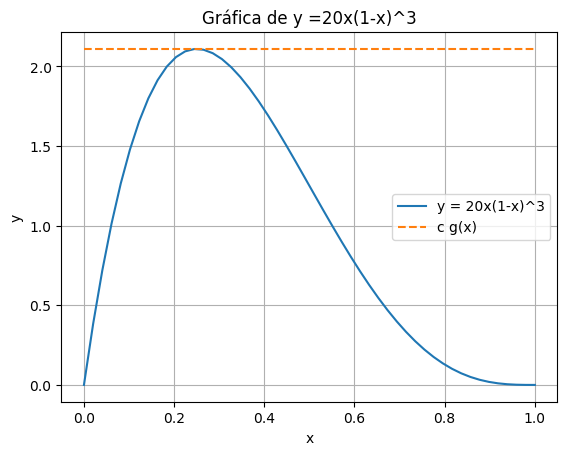

In [54]:
# Grafica de la función de distribución con la funcion que la acota
def Acot(x):
    return np.full_like(x, beta(0.25))



x = np.linspace(0, 1) 
y=beta(x)
z=Acot(x)
plt.plot(x,y,label='y = 20x(1-x)^3')
plt.plot(x,z,label="c g(x)",linestyle='--')
plt.title('Gráfica de y =20x(1-x)^3')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


In [60]:
def beta_acep(N):
    C=[] #Matriz vacia donde se almacenran los valores aceptados
    for i in range(N):
        y=rd.random() # Variable que sigue la distribucion g(x)
        u= np.random.uniform(0, 1) # Variable que sigue una distribucion uniforma 
        if u<=beta(y)/beta(0.25):
            C.append(y)
    return C

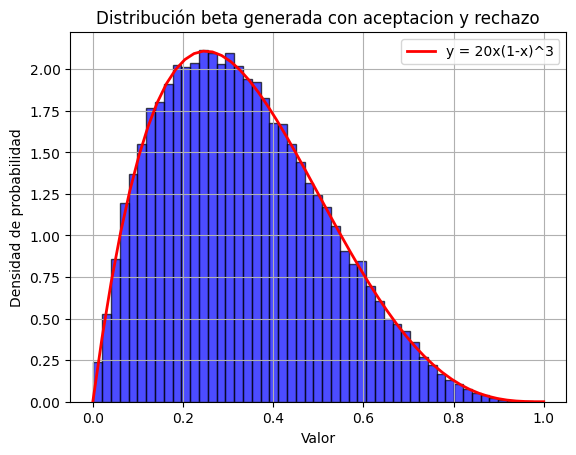

In [64]:
G=beta_acep(100000)
# Crear histograma para visualizar la distribución
plt.hist(G, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución beta generada con aceptacion y rechazo')
plt.grid(True)
# Graficar la función de densidad teórica
x = np.linspace(0, 1) 
y=beta(x)
plt.plot(x,y,'r-', lw=2,label='y = 20x(1-x)^3')
plt.legend()


# Mostrar la gráfica
plt.show()

In [65]:
def cdf(muestra):

  n=len(muestra)
  x=np.sort(muestra)
  y = np.arange(1, n + 1) / n
  return x,y

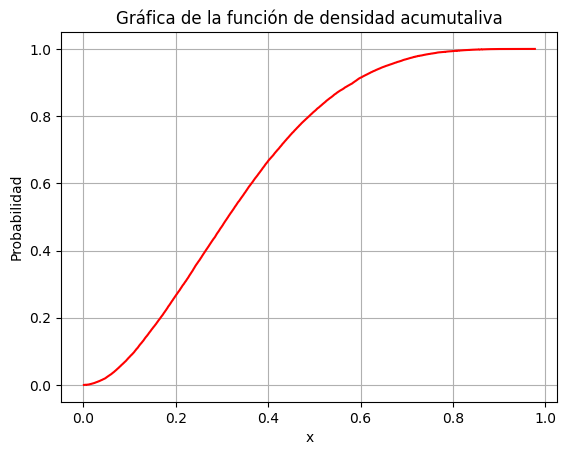

In [72]:
X, Y=cdf(G)
plt.step(X,Y,"r")
plt.title("Gráfica de la función de densidad acumutaliva")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.show()

$\textbf{Nota}$ Todo el codigo esta en el "Cataologo de distribuciones", ahi tengo todo pero revuelto